<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/vidyadharbendre/learn_machine_learning/blob/main/regression/jupyter_notebooks/01_house_price_prediction/house_pred_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/vidyadharbendre/learn_machine_learning/blob/main/regression/jupyter_notebooks/01_house_price_prediction/house_pred_model.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('C:\\Users\\Vasavi Varnika\\OneDrive\\Documents\\Student_Performance.csv')

# Display the first few rows of the dataframe
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1          91.000000  
1                                 2          65.000000  
2                                 2          45.000000  
3                                 2          36.000000  
4                                 5          66.000000  


In [4]:
df = pd.read_csv('C:\\Users\\Vasavi Varnika\\OneDrive\\Documents\\Student_Performance.csv')

In [5]:
#1_1. shape This is to know the number of rows and columns - shape of the data
df.shape

(10000, 6)

In [6]:
#1_2. df.info(). This is know the number of non-null entries, # of columns, datatypes & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


This output provides you with an overview of the DataFrame, such as the number of rows and columns, the column 
names, the data types, and memory usage. 
It's a handy tool for quickly understanding the structure of your dataset and identifying any missing values or
potential data type issues.

In [7]:
#1_3 df.head() - This is used to display the first five records.
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.000000
1,4,82,No,4,2,65.000000
2,8,51,Yes,7,2,45.000000
3,5,52,Yes,5,2,36.000000
4,7,75,No,8,5,66.000000


In [8]:
#1_4. df.head().transpose()

df.head().transpose()

,0,1,2,3,4
Hours Studied,7,4,8,5,7
Previous Scores,99,82,51,52,75
Extracurricular Activities,Yes,No,Yes,Yes,No
Sleep Hours,9,4,7,5,8
Sample Question Papers Practiced,1,2,2,2,5
Performance Index,91.000000,65.000000,45.000000,36.000000,66.000000


In this above example, df.head() is applied to the DataFrame first, showing the first 5 rows. 
Then, df.transpose() is applied to the result, swapping the rows and columns of those 5 rows. 
This can be useful when you want to examine the initial data points across columns more closely.

In [9]:
#1_5 df.tail - displays the bottom 5 rows
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.000000
9996,7,64,Yes,8,5,58.000000
9997,6,83,Yes,8,5,74.000000
9998,9,97,Yes,7,0,95.000000
9999,7,74,No,8,1,64.000000


We can adjust the number of rows displayed by passing the desired number as an argument to df.tail(). 
For example, df.tail(10) would show the last 10 rows of the DataFrame, and 
df.tail(1) would display only the very last row.

This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in
the DataFrame. 
It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [10]:
#2_1.Type Casting (astype) 

In [11]:
#3 - Missing Value Treatment

In [12]:
#3_1 -  use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df.isnull().sum()

# print the missing values
missing_values

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [13]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
Hours Studied,0,0.000000,int64
Previous Scores,0,0.000000,int64
Extracurricular Activities,0,0.000000,object
Sleep Hours,0,0.000000,int64
Sample Question Papers Practiced,0,0.000000,int64
Performance Index,0,0.000000,float64


In [14]:
#4_1_1. Five point summary - df.describe()
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [15]:
df.columns
import matplotlib.pyplot as plt

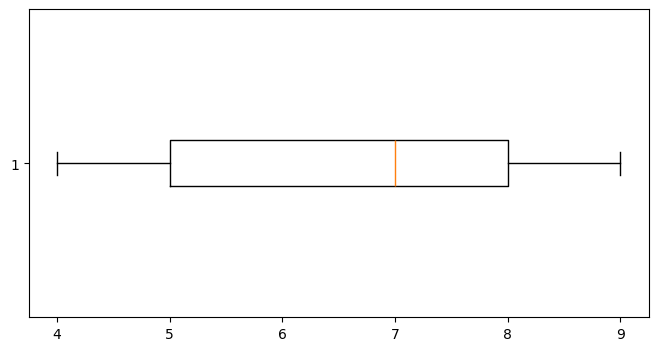

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(df['Sleep Hours'], vert=False)
plt.show()


This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in the DataFrame. It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [19]:
#4_1_2. Five point summary for categorical columns - /include = object for categorical - Five Point Summary
df.describe(include=object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


In [20]:
#4_1_2. Five point summary for categorical columns
df.describe(exclude=np.number)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


In [21]:
# calculate the variance
var = df.var(numeric_only=True)

# rounding off the values upto 3 decimals
round(var, 6)

Hours Studied                        6.704520
Previous Scores                    300.784930
Sleep Hours                          2.875951
Sample Question Papers Practiced     8.221683
Performance Index                  369.122377
dtype: float64

The variance indicates how much is the data varying from the mean. 
The output suggests that the variable bathrooms has the least variance and the variable price has the maximum variance.

In [22]:
df.std(numeric_only=True)

Hours Studied                       2.589309
Previous Scores                    17.343152
Sleep Hours                         1.695863
Sample Question Papers Practiced    2.867348
Performance Index                  19.212558
dtype: float64

Interpretation: We can see that the variable 'bathrooms' has a standard deviation near to zero. 
It indicates that there is not much variability. 
Thus this variable does not add much value to the analysis and can be further removed from the study.
However, it is not sensible to compare variation in variables having different units because they vary in their respective units and the means about which they occur.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

NameError: name 'df' is not defined

In [24]:
df_num.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

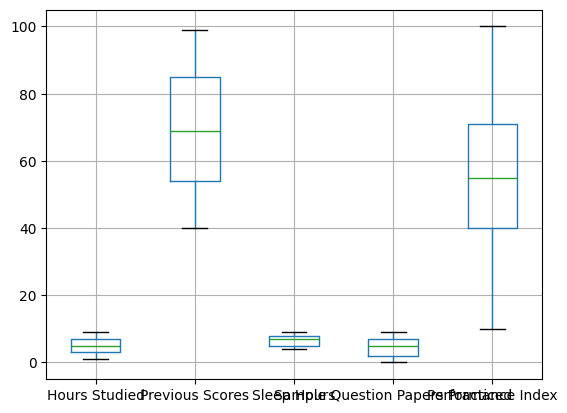

In [25]:
df_num.boxplot()
plt.show()

In [26]:
print(df_num.columns)


Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [27]:
# filter the categorical variables from the data
df_cat = df.select_dtypes(exclude = np.number)
df_cat.columns

Index(['Extracurricular Activities'], dtype='object')

In [28]:
# find the range
print(df_num.quantile(0.75)-df_num.quantile(0.25))

Hours Studied                       4.000000
Previous Scores                    31.000000
Sleep Hours                         3.000000
Sample Question Papers Practiced    5.000000
Performance Index                  31.000000
dtype: float64


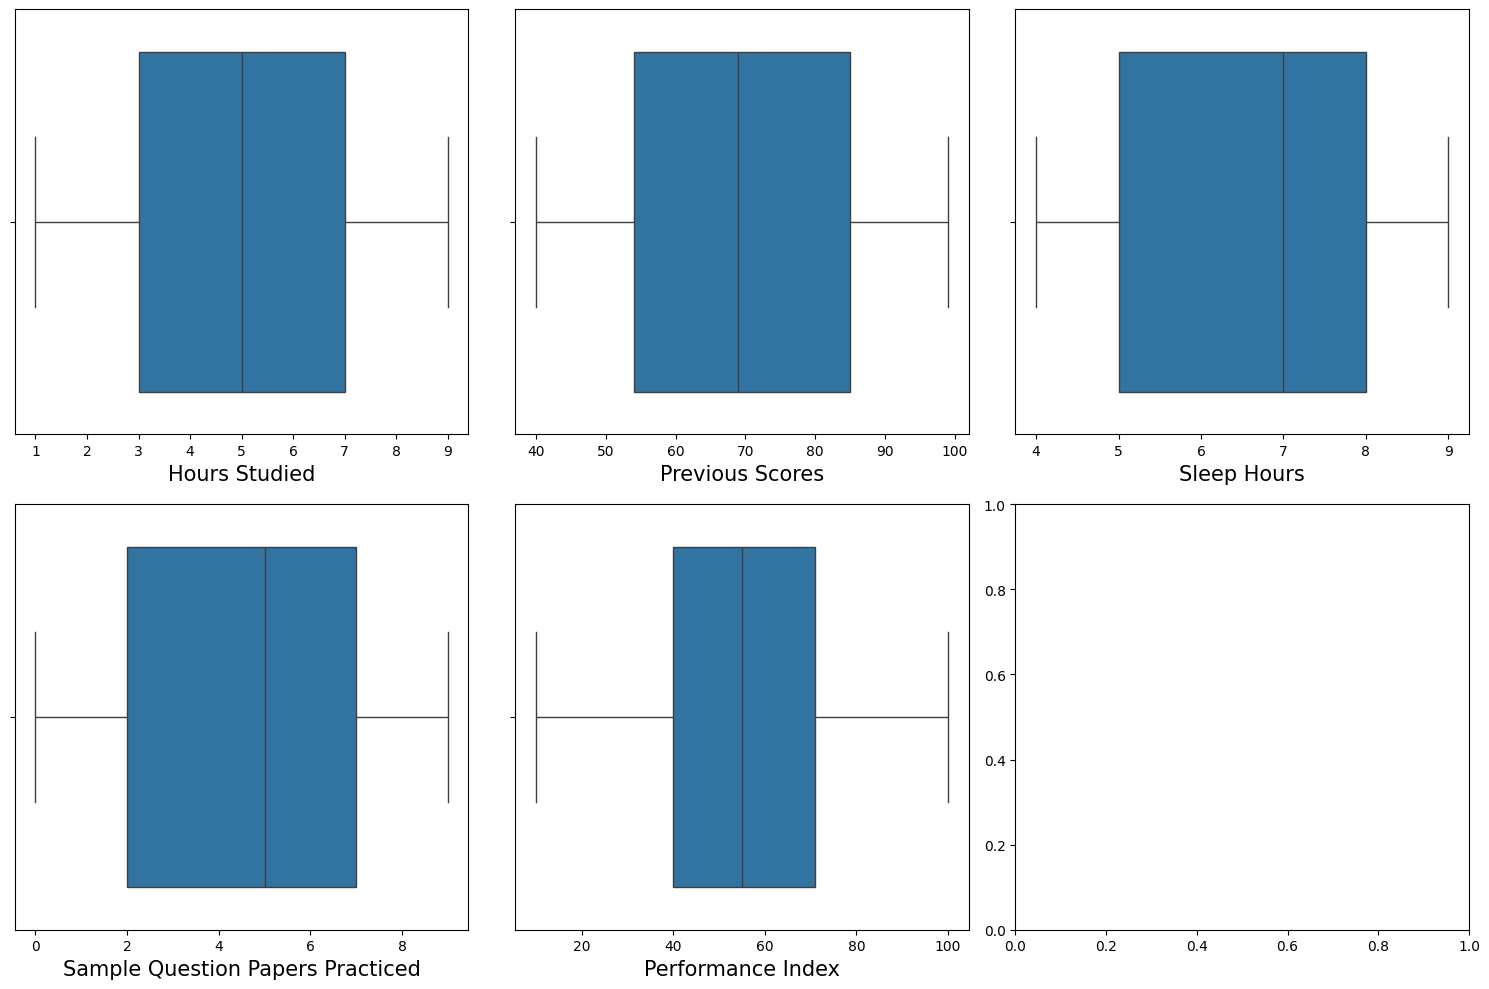

In [29]:
#4_2_1 - This is to visualize the distribution of numeric data through box plots.

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the numeric columns from your DataFrame
df_num = df.select_dtypes(include=np.number)

# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the numeric columns and their corresponding subplots
for column, subplot in zip(df_num.columns, axes.flatten()):
    sns.boxplot(x=df[column], ax=subplot)
    subplot.set_xlabel(column, fontsize=15)

plt.tight_layout()
plt.show()

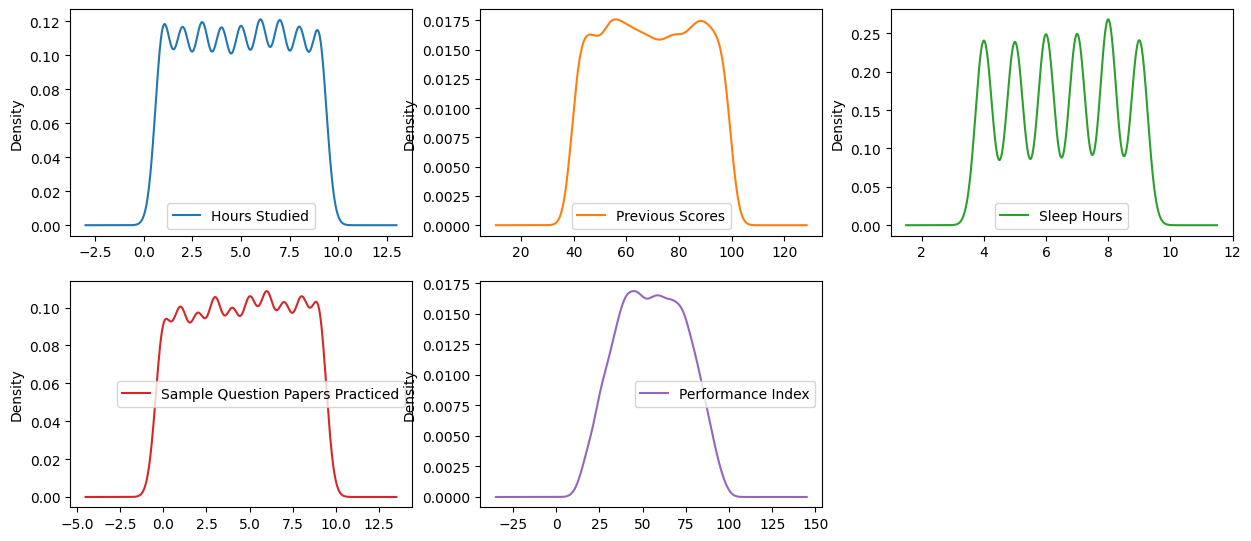

In [30]:
#4_2_2 - This is to visualize the distribution of variables in a DataFrame using density plots
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [13]:
import pandas as pd

# Load the CSV file to see its contents
file_path = "C://Users//Vasavi Varnika//OneDrive//Documents//Student_Performance.csv"
df = pd.read_csv(file_path)


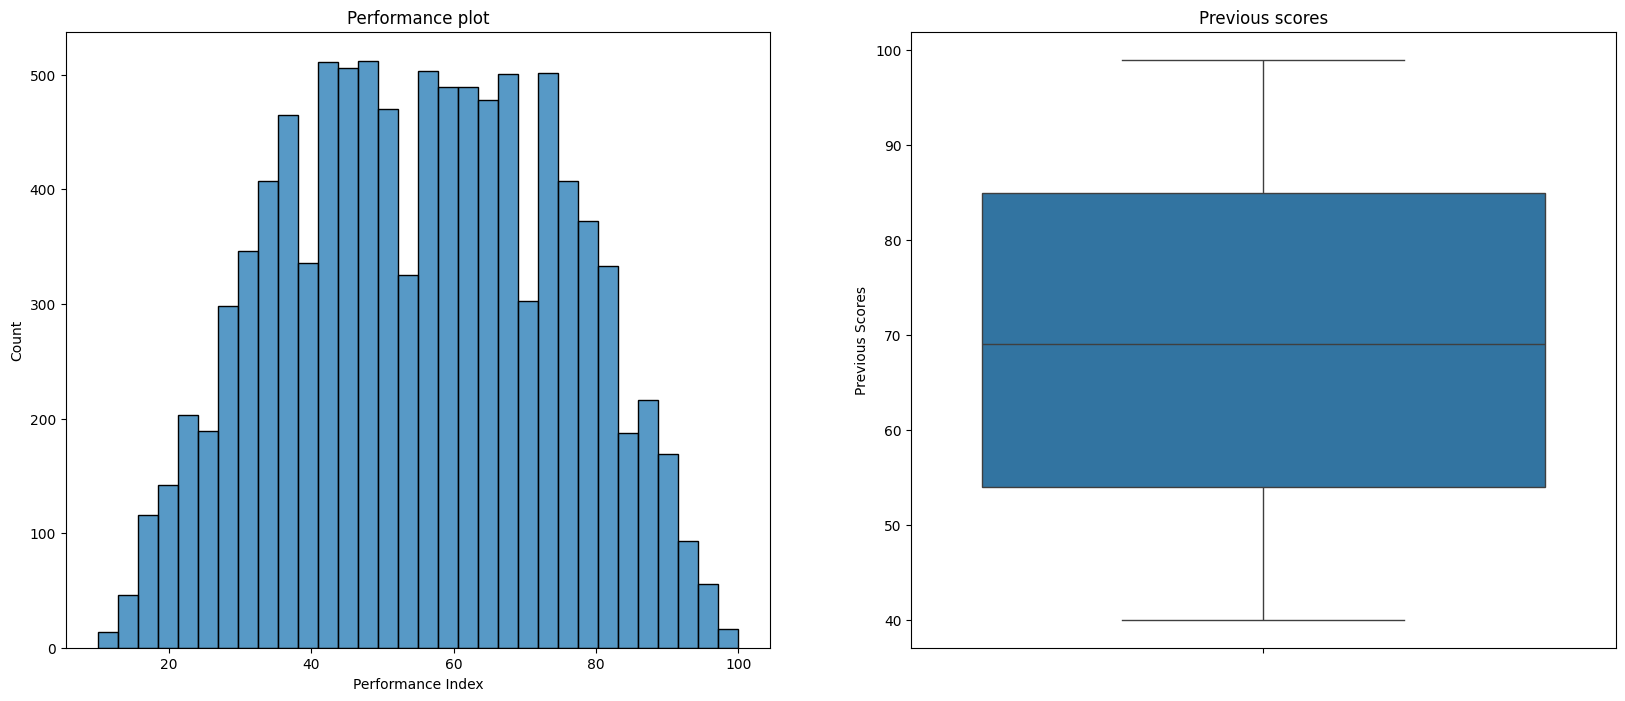

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is already defined and loaded as shown earlier
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('Performance plot')
sns.histplot(df['Performance Index'])

plt.subplot(1, 2, 2)
plt.title('Previous scores')
sns.boxplot(y=df['Previous Scores'])

plt.show()


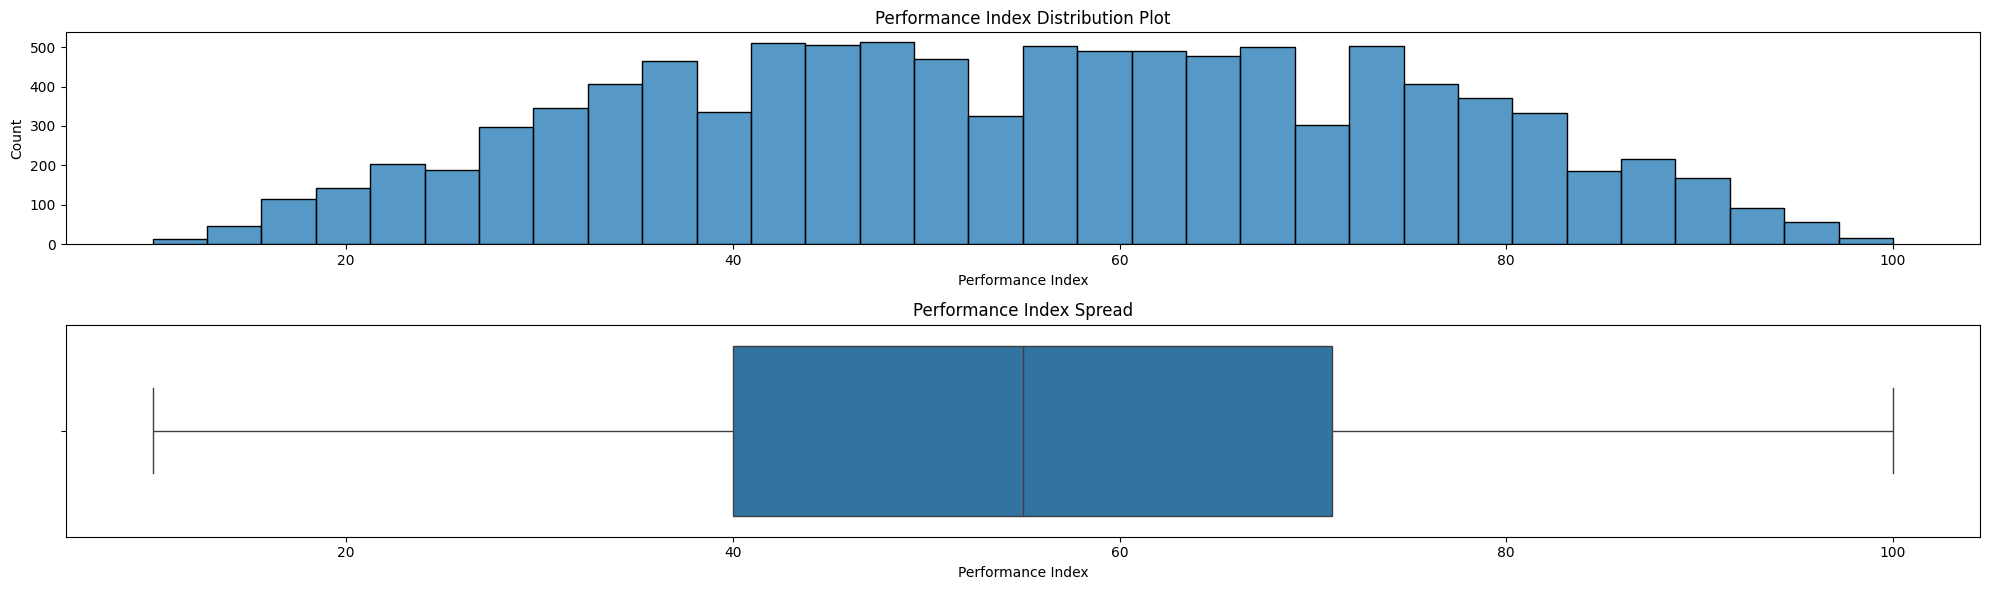

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(20, 6))

plt.subplot(2, 1, 1)  # Create two rows, one column, and select the first subplot
plt.title('Performance Index Distribution Plot')
sns.histplot(df['Performance Index'])

plt.subplot(2, 1, 2)  # Create two rows, one column, and select the second subplot
plt.title('Performance Index Spread')
sns.boxplot(data=df, x='Performance Index', orient='h')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [16]:
import pandas as pd

# Load the CSV file (if not already loaded)
df = pd.read_csv( "C://Users//Vasavi Varnika//OneDrive//Documents//Student_Performance.csv")

# Calculate mean, median, and mode for Performance Index
mean_performance_index = df['Performance Index'].mean()
median_performance_index = df['Performance Index'].median()
mode_performance_index = df['Performance Index'].mode()[0]  # mode() returns a Series

# Calculate skewness and kurtosis for Performance Index
skewness_performance_index = df['Performance Index'].skew()
kurtosis_performance_index = df['Performance Index'].kurtosis()

# Display the results
print("Mean Performance Index:", mean_performance_index)
print("Median Performance Index:", median_performance_index)
print("Mode Performance Index:", mode_performance_index)
print("Skewness of Performance Index:", skewness_performance_index)
print("Kurtosis of Performance Index:", kurtosis_performance_index)

Mean Performance Index: 55.2248
Median Performance Index: 55.0
Mode Performance Index: 67.0
Skewness of Performance Index: -0.0017400273072201125
Kurtosis of Performance Index: -0.8605230998210018


In [21]:
import pandas as pd
import numpy as np

# Load your DataFrame
df = pd.read_csv("C://Users//Vasavi Varnika//OneDrive//Documents//Student_Performance.csv")

# Define df_num as a subset of df containing only numeric columns
df_num = df.select_dtypes(include=[np.number])

# Now you can safely access df_num.columns
print(df_num.columns)

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


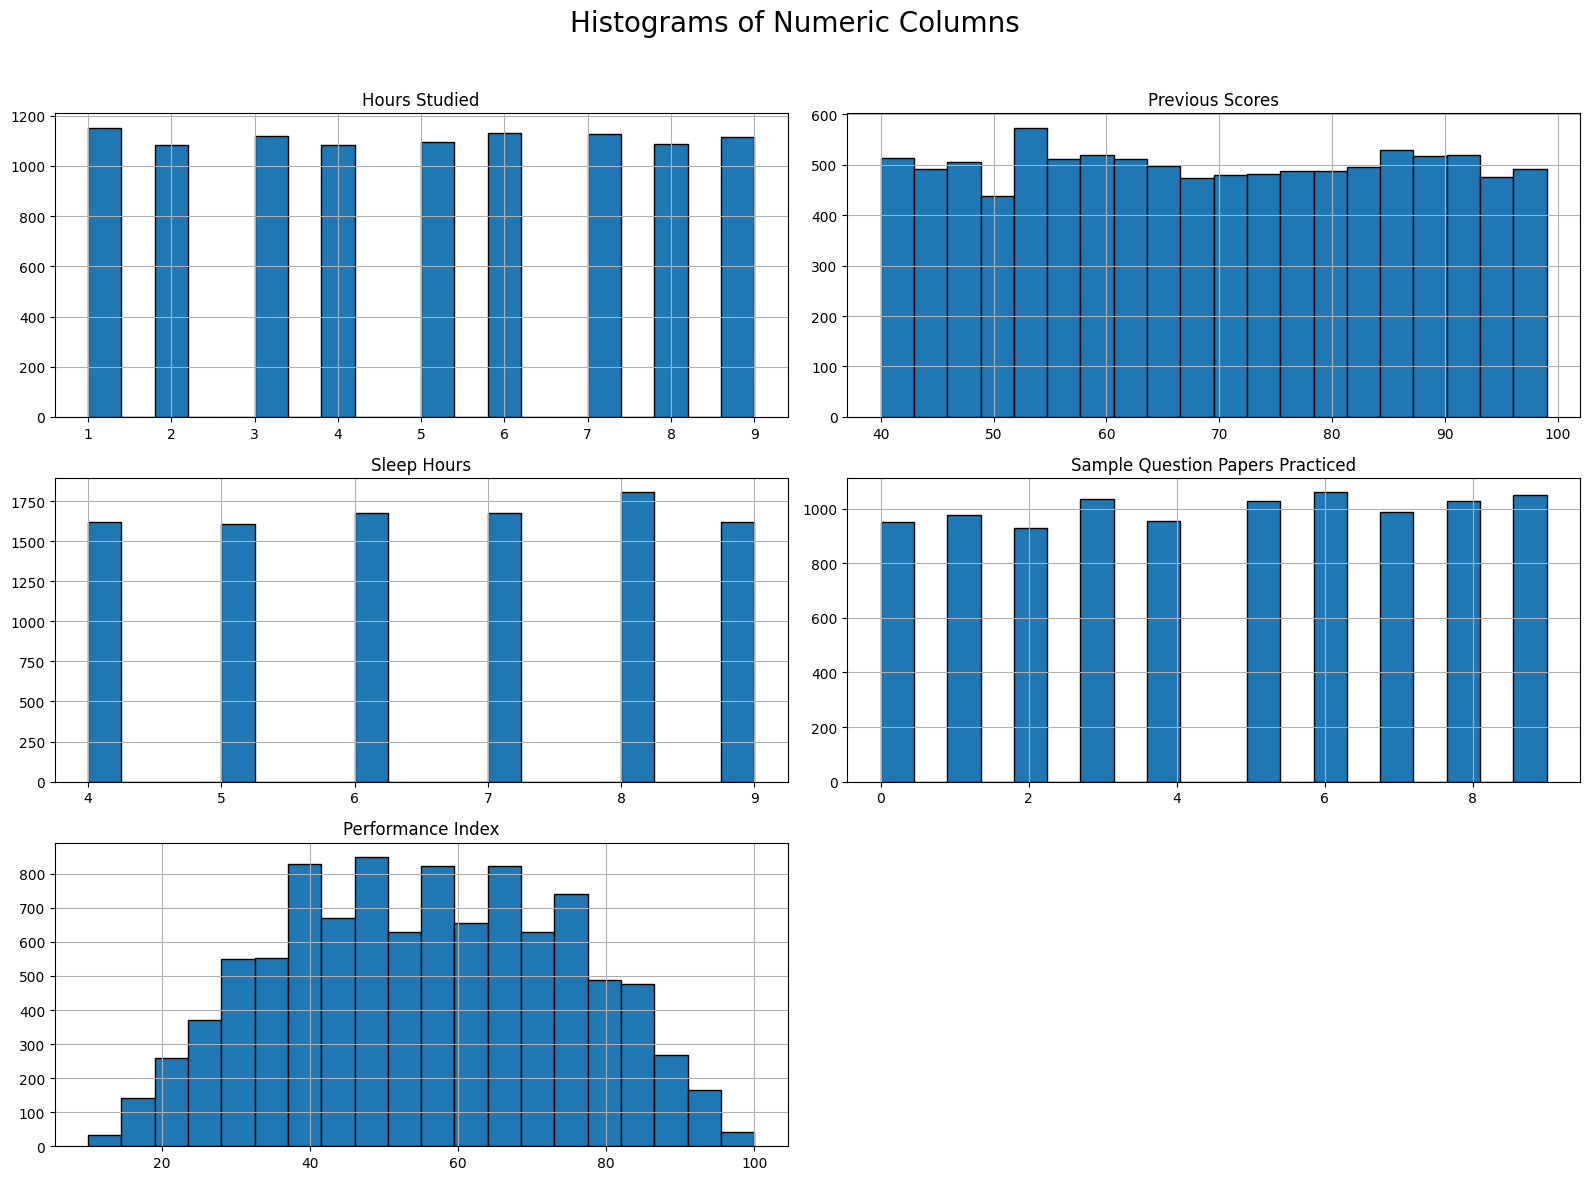

In [22]:
df_num = df.select_dtypes(include='number')

# Plot histograms for each numeric column
df_num.hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Columns', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [23]:
df_num.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

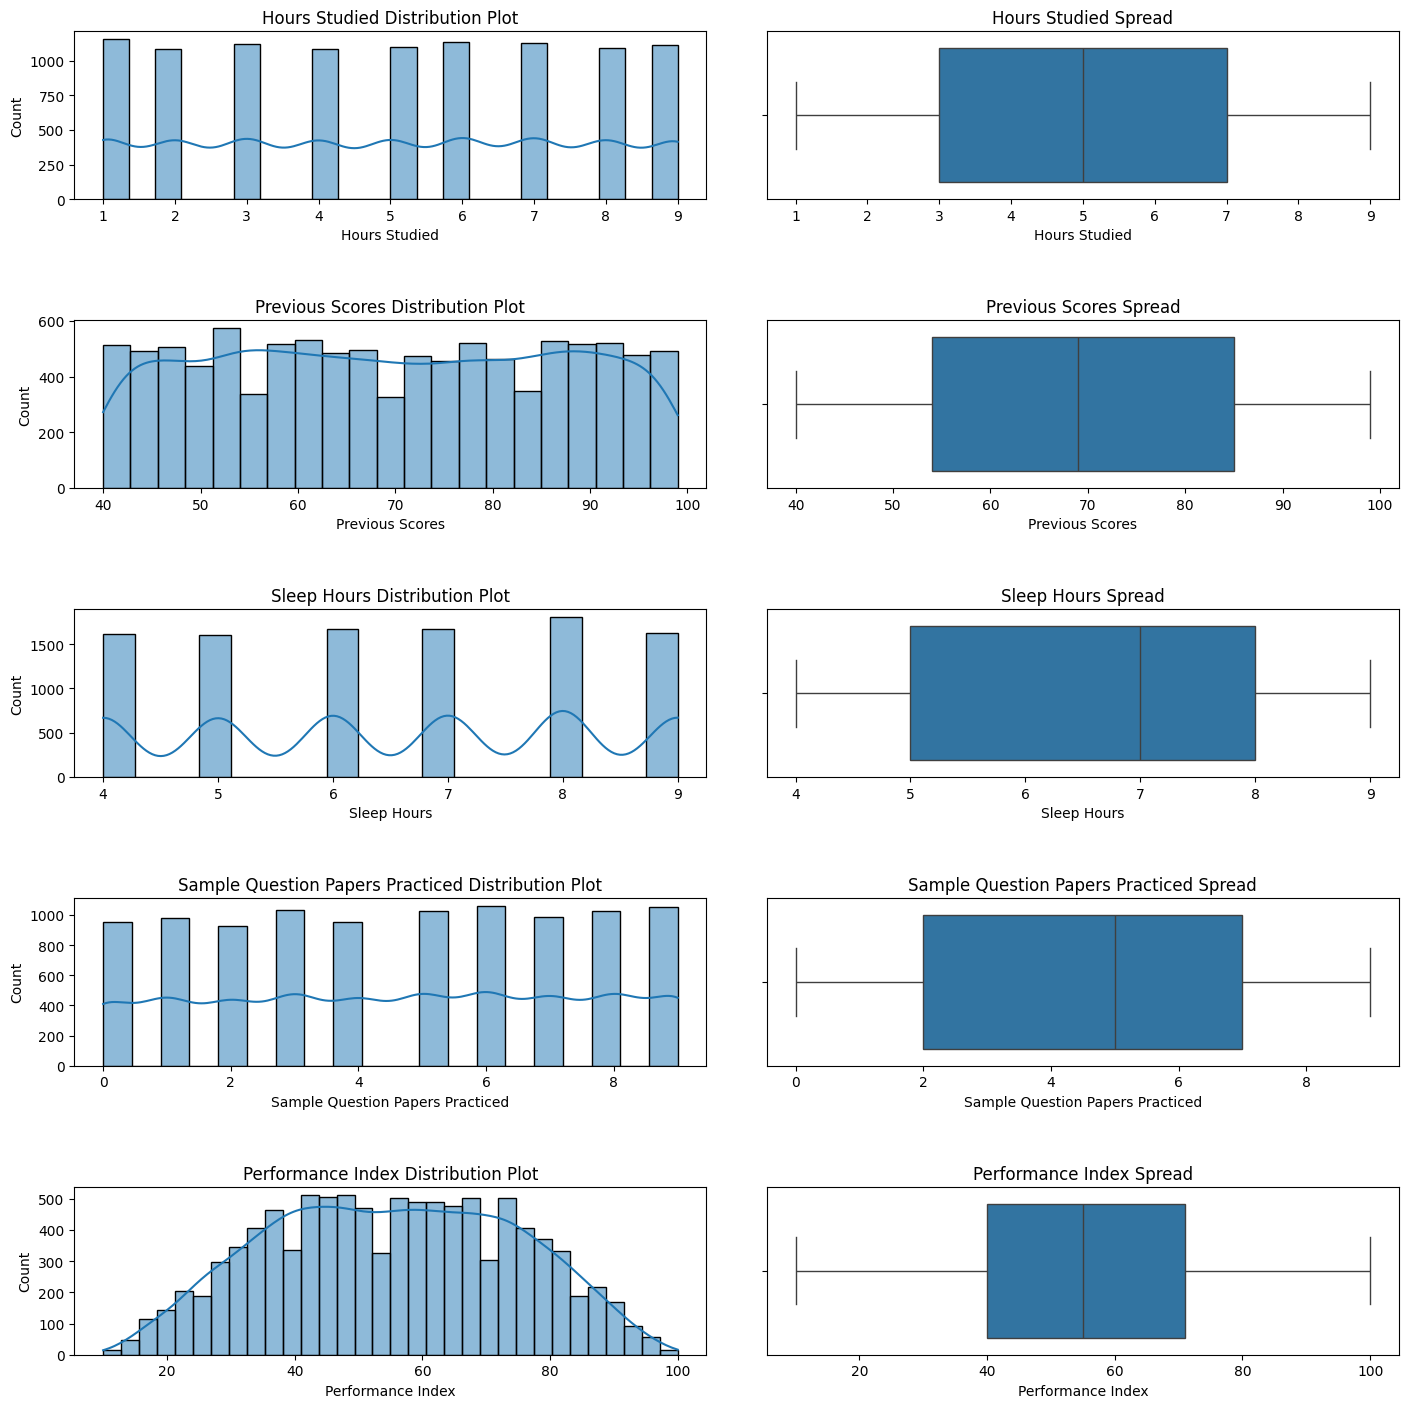

In [24]:
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

# Calculate the number of rows needed
n_rows = len(numeric_columns)
n_cols = 2  # Two plots per column (histogram and box plot)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate over the numeric columns and their corresponding subplots
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} Distribution Plot')
    
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'{column} Spread')

plt.tight_layout(pad=4.0)
plt.show()

In [26]:
# use skew() to calculate the skewness
skew = df.skew(numeric_only=True)

# print the skewness
print(skew)

Hours Studied                      -0.004213
Previous Scores                     0.004502
Sleep Hours                        -0.039474
Sample Question Papers Practiced   -0.035636
Performance Index                  -0.001740
dtype: float64


## Kurtosis 

Kurtosis a statistical measure that describes the distribution of data points in a dataset relative to the mean and how the tails of the distribution differ from the tails of a normal distribution. Specifically, kurtosis measures the "tailedness" of the data distribution.

### Types of Kurtosis

#### Mesokurtic:

- Kurtosis value: Approximately 3.
- Description: A distribution with kurtosis similar to that of a normal distribution (e.g., Gaussian distribution). It has a moderate peak and tails.

#### Leptokurtic:

- Kurtosis value: Greater than 3.
- Description: A distribution with more extreme outliers than a normal distribution. It has a higher peak and fatter tails. This indicates that the data has heavy tails and more peakedness around the mean.

#### Platykurtic:

- Kurtosis value: Less than 3.
- Description: A distribution with fewer and less extreme outliers than a normal distribution. It has a flatter peak and thinner tails. This indicates that the data has light tails and less peakedness around the mean.

## Interpretation of Kurtosis

### High Kurtosis (Leptokurtic):

Indicates a high level of outliers.
Data tends to have heavy tails and a sharp peak.
Example: Data with frequent large deviations from the mean.

### Low Kurtosis (Platykurtic):

Indicates a low level of outliers.
Data tends to have light tails and a flat peak.
Example: Data that are spread out more evenly around the mean.


In [60]:
# use kurt() to calculate the kurtosis
df.kurt(numeric_only=True)

price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64

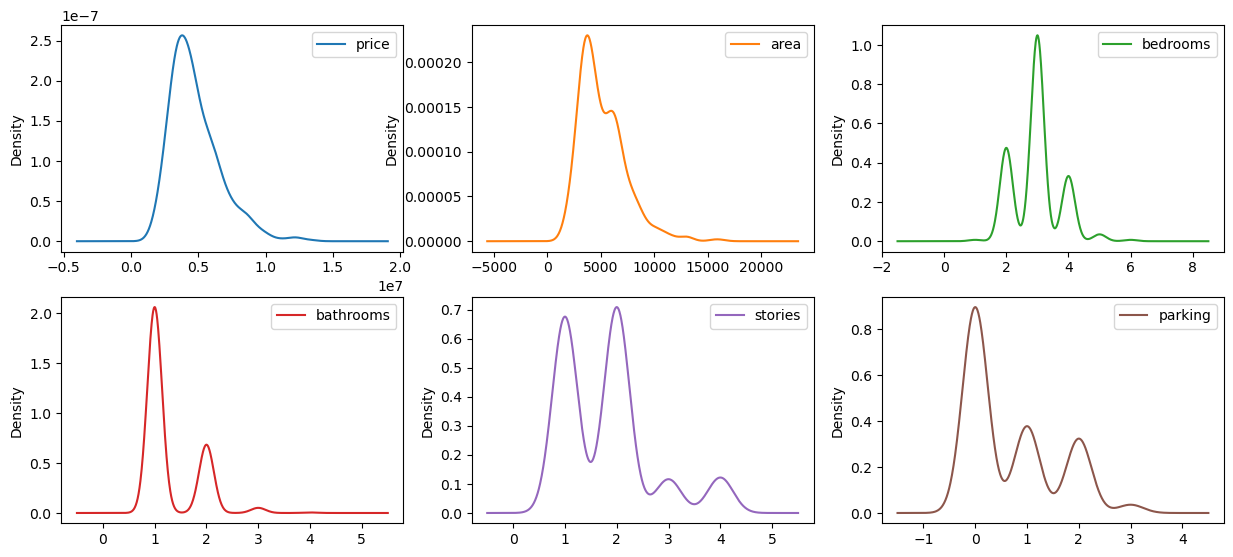

In [61]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [62]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

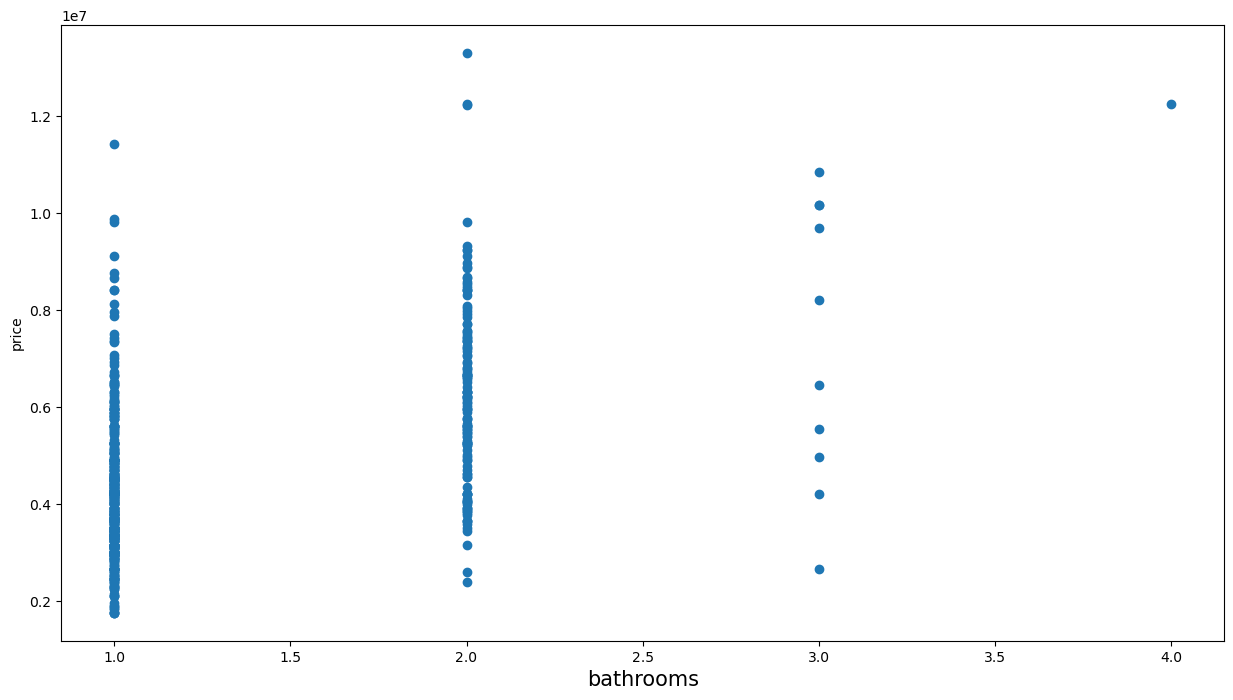

In [63]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["bathrooms"], df["price"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("bathrooms", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('price')
plt.show()

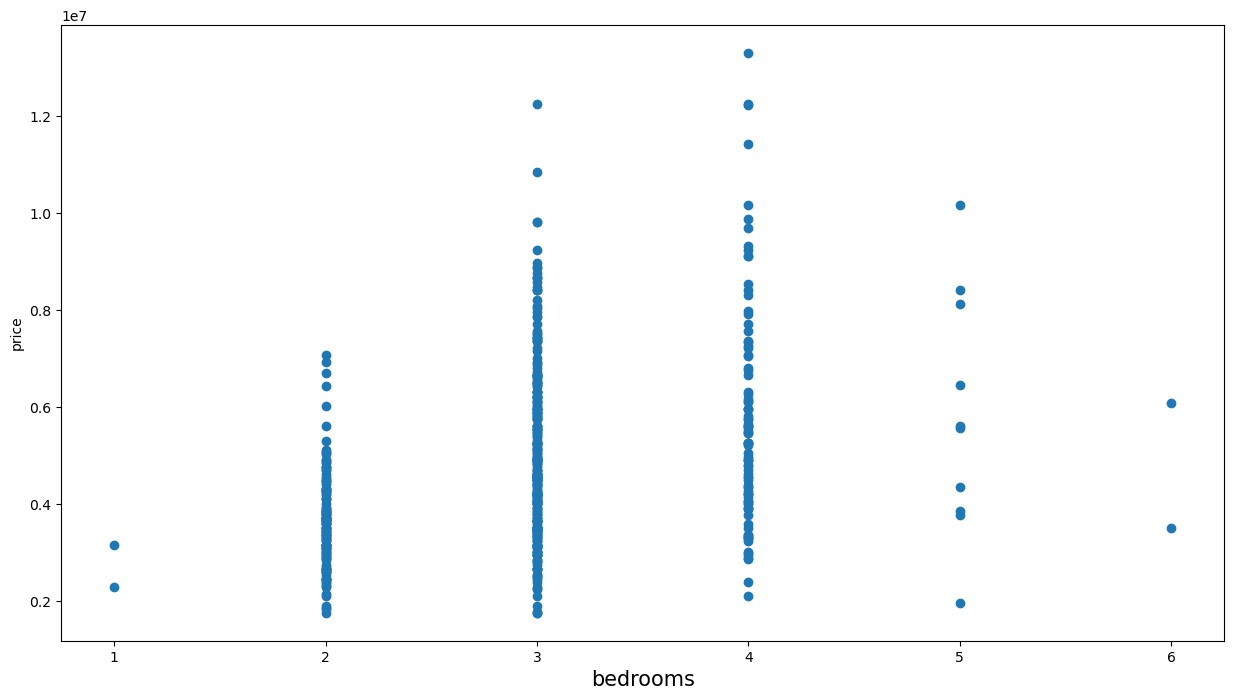

In [64]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["bedrooms"], df["price"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("bedrooms", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('price')
plt.show()

In [65]:
#Correlation

df_num.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


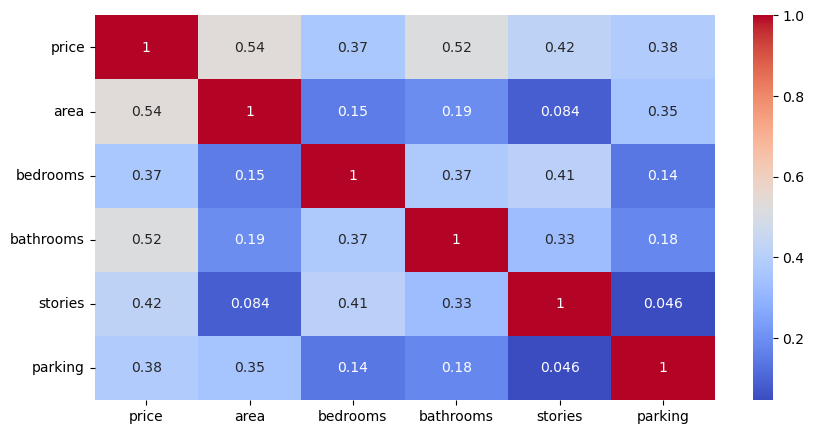

In [66]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_num.corr(),annot=True, cmap='coolwarm')
plt.show()

In [67]:
# removing features that are less correlated with our target variable
df_num.corr()[df_num.corr().price<=0.05]

,price,area,bedrooms,bathrooms,stories,parking


In [68]:
# removing features that are less correlated with our target variable
df_num.corr().price[df_num.corr().price <= 0.05]


Series([], Name: price, dtype: float64)

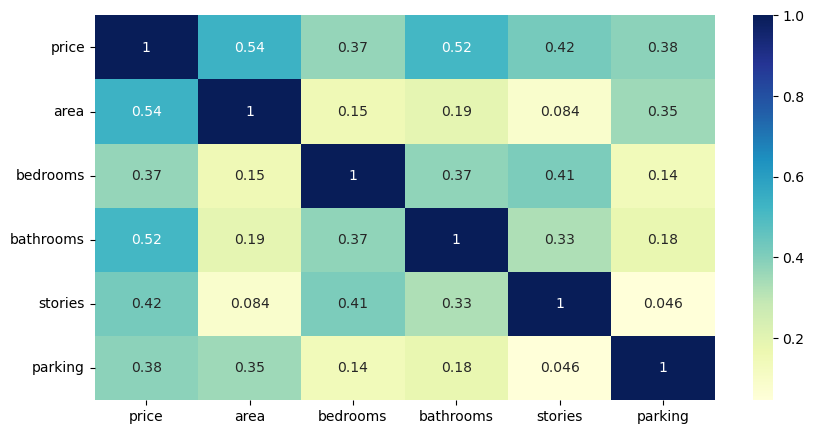

In [69]:
#Correlation using heatmap
plt.figure(figsize = (10, 5))
sns.heatmap(df_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

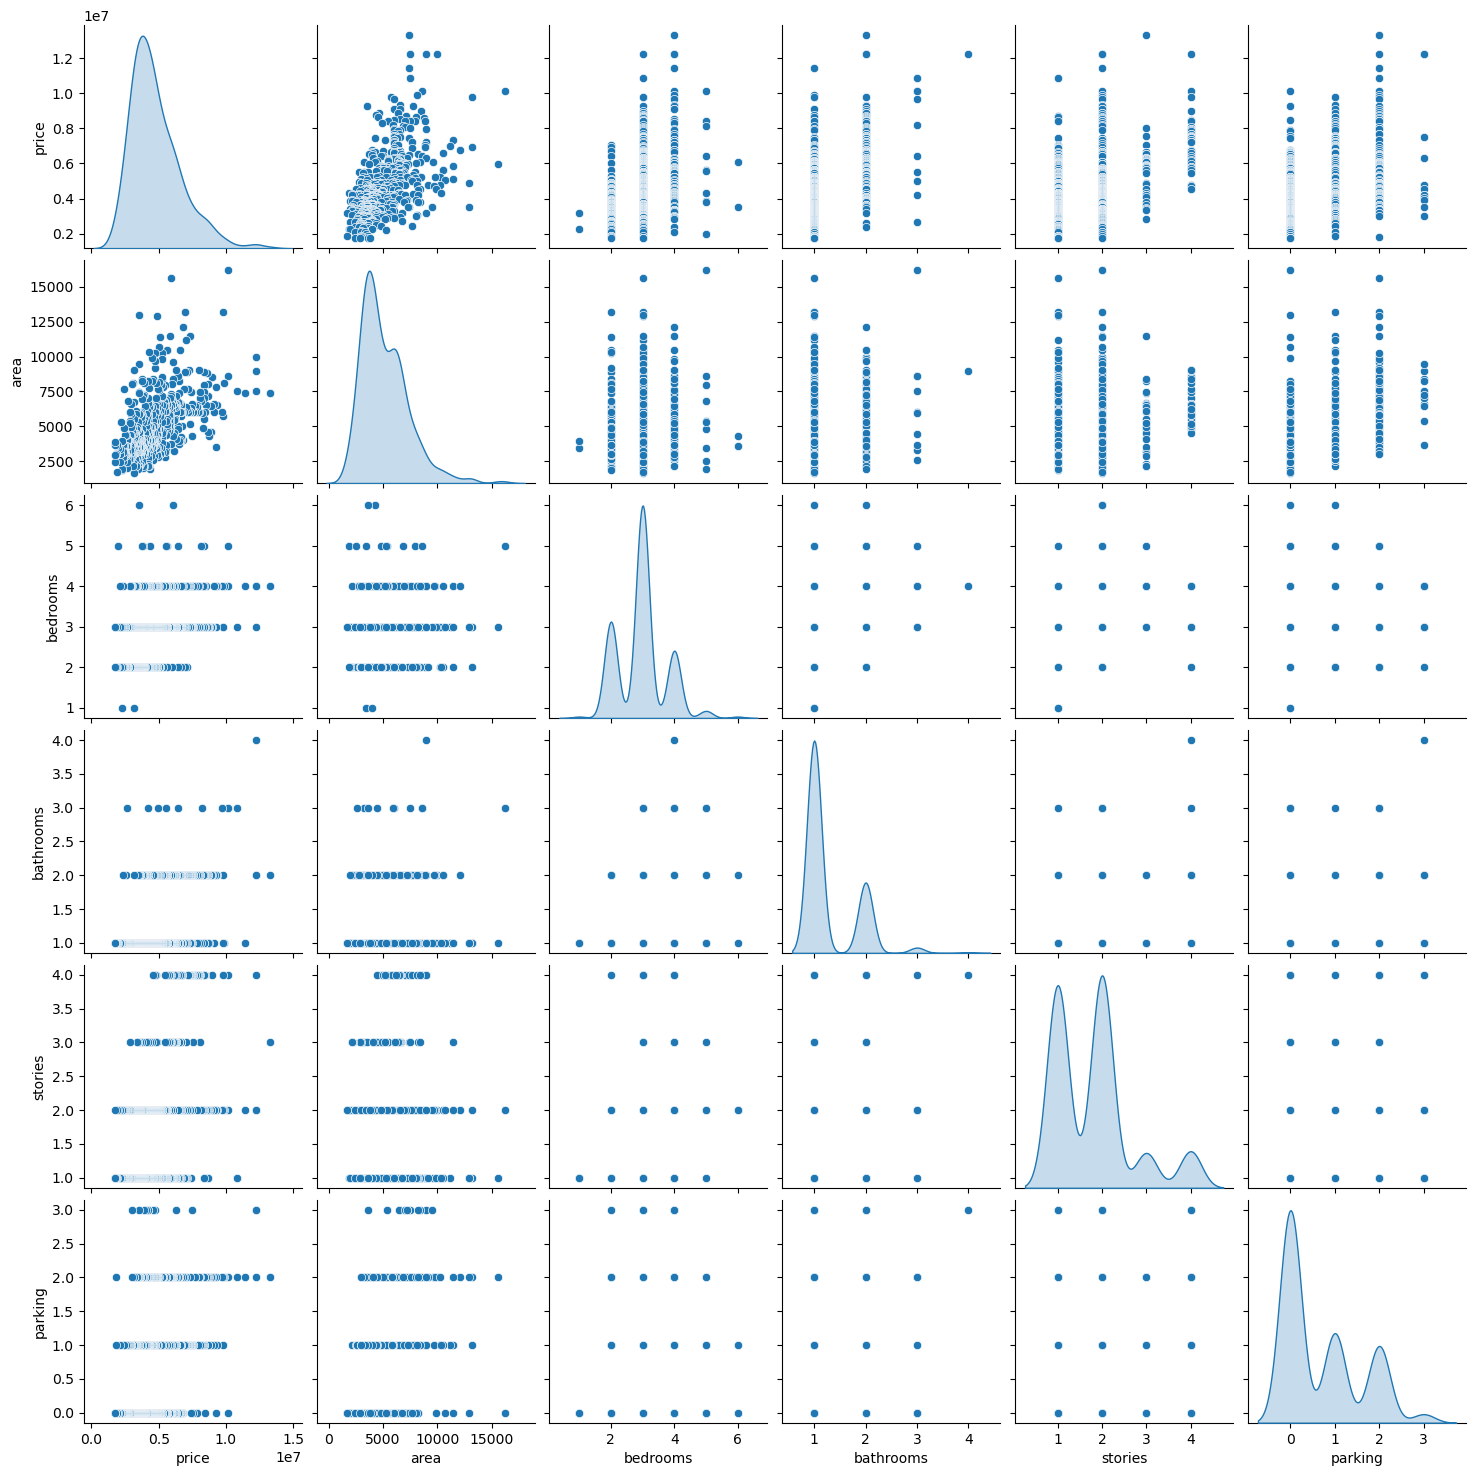

In [70]:
sns.pairplot(data=df_num, diag_kind='kde')
plt.show()

In [71]:
# Do type casting and impute missing values - mean/median and mode (categorical)

In [72]:
# skew - -0.5 to +0.5 - acceptance

In [73]:
df.skew(numeric_only=True)

price       1.212239
area        1.321188
bedrooms    0.495684
bathrooms   1.589264
stories     1.082088
parking     0.842062
dtype: float64

In [74]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [75]:
df.price.describe()

count        545.000000
mean     4766729.247706
std      1870439.615657
min      1750000.000000
25%      3430000.000000
50%      4340000.000000
75%      5740000.000000
max     13300000.000000
Name: price, dtype: float64

In [76]:
df_cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [77]:
df_num.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [78]:
# Assuming df is your DataFrame and columns_to_transform contains numerical columns
power_transformer = PowerTransformer()

In [79]:
power_transformer.fit_transform()

TypeError: wrapped() missing 1 required positional argument: 'X'

In [80]:
pt = power_transformer.fit_transform(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
pt

array([[ 2.77097674,  1.11545673,  1.35413392,  1.66118585,  1.33057611,
         1.34730508],
       [ 2.57875644,  1.55960141,  1.35413392,  1.76728263,  1.81464089,
         1.61415896],
       [ 2.57875644,  1.80429146,  0.12330349,  1.66118585,  0.52147758,
         1.34730508],
       ...,
       [-2.64987025, -0.67255906, -1.39272943, -0.59919871, -1.10310312,
        -0.88952552],
       [-2.64987025, -1.24861134,  0.12330349, -0.59919871, -1.10310312,
        -0.88952552],
       [-2.64987025, -0.51281107,  0.12330349, -0.59919871,  0.52147758,
        -0.88952552]])

In [27]:
df_pt = pd.DataFrame(data=pt, columns=df_num.columns)
df_pt.head()

NameError: name 'pt' is not defined

In [83]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [84]:
df_pt.head()

,price,area,bedrooms,bathrooms,stories,parking
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305


In [85]:
mean_values = df_pt.mean(axis=0)
std_dev_values = df_pt.std(axis=0)

print("Mean values:", mean_values)
print("Standard Deviation values:", std_dev_values)


Mean values: price        0.000000
area         0.000000
bedrooms     0.000000
bathrooms   -0.000000
stories      0.000000
parking      0.000000
dtype: float64
Standard Deviation values: price       1.000919
area        1.000919
bedrooms    1.000919
bathrooms   1.000919
stories     1.000919
parking     1.000919
dtype: float64


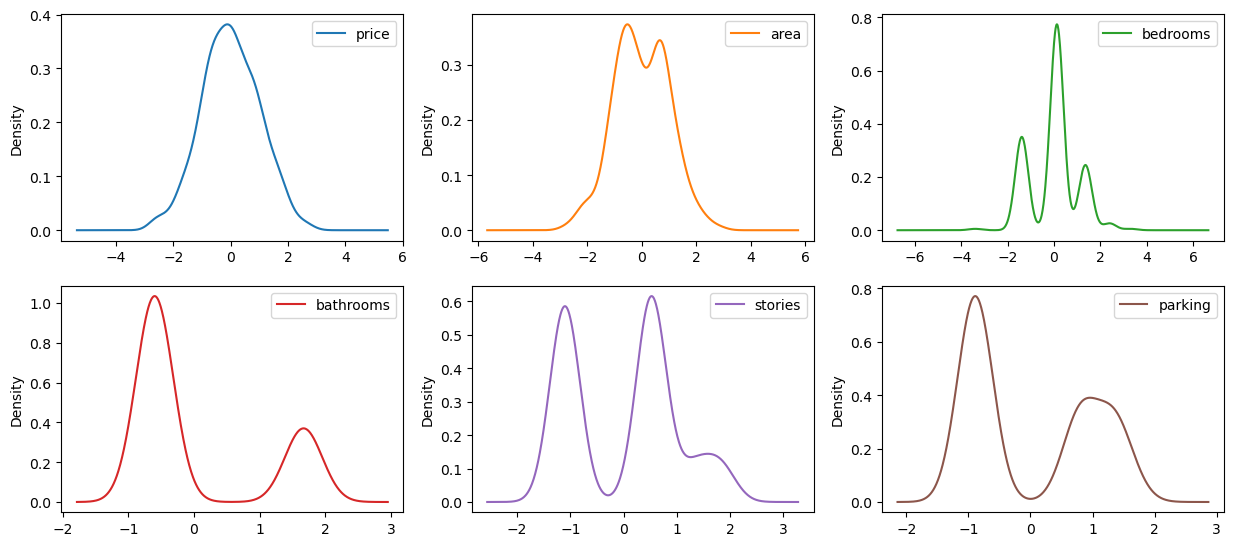

In [86]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df_pt.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

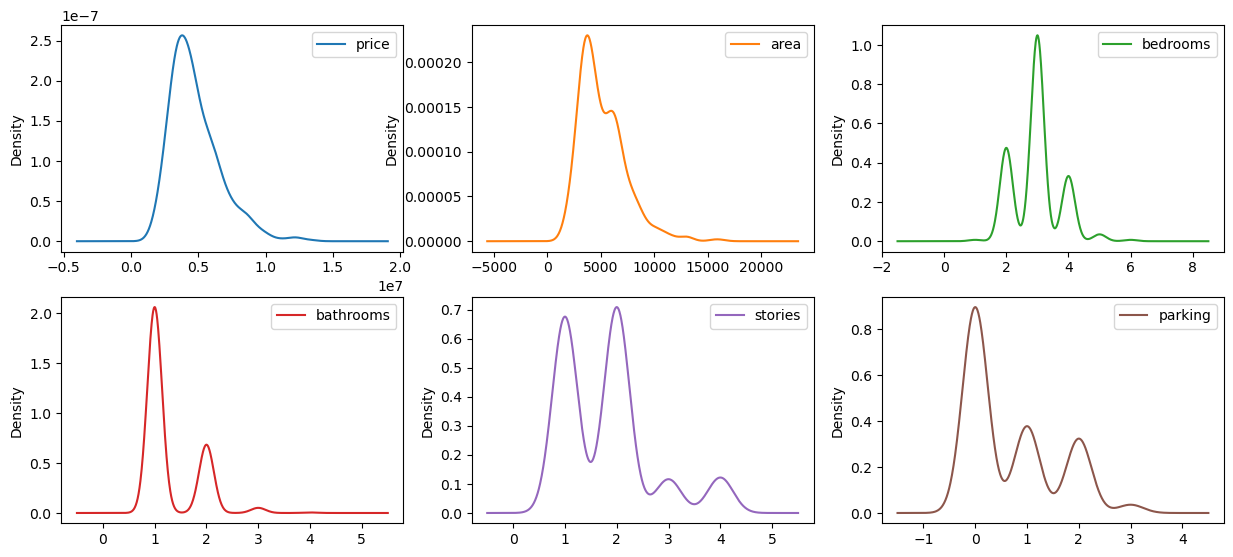

In [87]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [88]:
df_cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [89]:
df_cat.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [90]:
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head(10)

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,True,False,False,False,True,True,False,False
1,True,False,False,False,True,False,False,False
2,True,False,True,False,False,True,True,False
3,True,False,True,False,True,True,False,False
4,True,True,True,False,True,False,False,False
5,True,False,True,False,True,True,True,False
6,True,False,False,False,True,True,True,False
7,True,False,False,False,False,False,False,True
8,True,True,True,False,True,True,False,False
9,True,True,False,False,True,True,False,True


In [91]:
df_cat_encoded.columns

Index(['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [92]:
df_pt.head()

,price,area,bedrooms,bathrooms,stories,parking
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305


In [93]:
df_ready = pd.concat([df_pt, df_cat_encoded], axis=1)
df_ready.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305,True,False,False,False,True,True,False,False
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159,True,False,False,False,True,False,False,False
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305,True,False,True,False,False,True,True,False
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159,True,False,True,False,True,True,False,False
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305,True,True,True,False,True,False,False,False


In [94]:
X.head()

NameError: name 'X' is not defined

In [95]:
y.head()

NameError: name 'y' is not defined

In [96]:
train_test_split()

ValueError: At least one array required as input

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

In [98]:
len(X), len(X_train), len(X_test)

NameError: name 'X' is not defined

In [99]:
0.7*(545)

381.5

In [100]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_ready.drop('price', axis = 1)

# dependent variable
y = df_ready['price']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (381, 14)
y_train (381,)
X_test (164, 14)
y_test (164,)


In [101]:
X_train.head()

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,1.000000,1.030285,0.123303,-0.599199,-1.103103,1.347305,True,False,True,False,False,True,False,True
363,1.000000,-0.698593,-1.392729,-0.599199,-1.103103,-0.889526,True,False,False,True,False,False,True,False
370,1.000000,-0.241047,-1.392729,-0.599199,-1.103103,1.347305,True,False,False,False,True,False,True,False
31,1.000000,0.976125,0.123303,-0.599199,1.814641,1.347305,True,False,False,False,True,False,True,False
113,1.000000,1.724320,0.123303,-0.599199,-1.103103,1.347305,True,False,True,False,False,True,False,False


In [102]:
import statsmodels
import statsmodels.api as sm

In [103]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [104]:
y_pred = MLR_model.predict(X_test)

NameError: name 'MLR_model' is not defined

In [100]:
y_pred = MLR_model.predict(X_test)

In [101]:
np.sum((y_pred - y_test)*(y_pred - y_test))/len(y_test)

0.4178691024333501

In [102]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [103]:
mse(y_test, y_pred)

0.4178691024333501

In [104]:
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
rmse

0.05047754284739573

In [105]:
np.sum(np.abs((y_pred - y_test)))/len(y_test)

0.5069004491614882

In [106]:
mae(y_test, y_pred)

0.5069004491614882

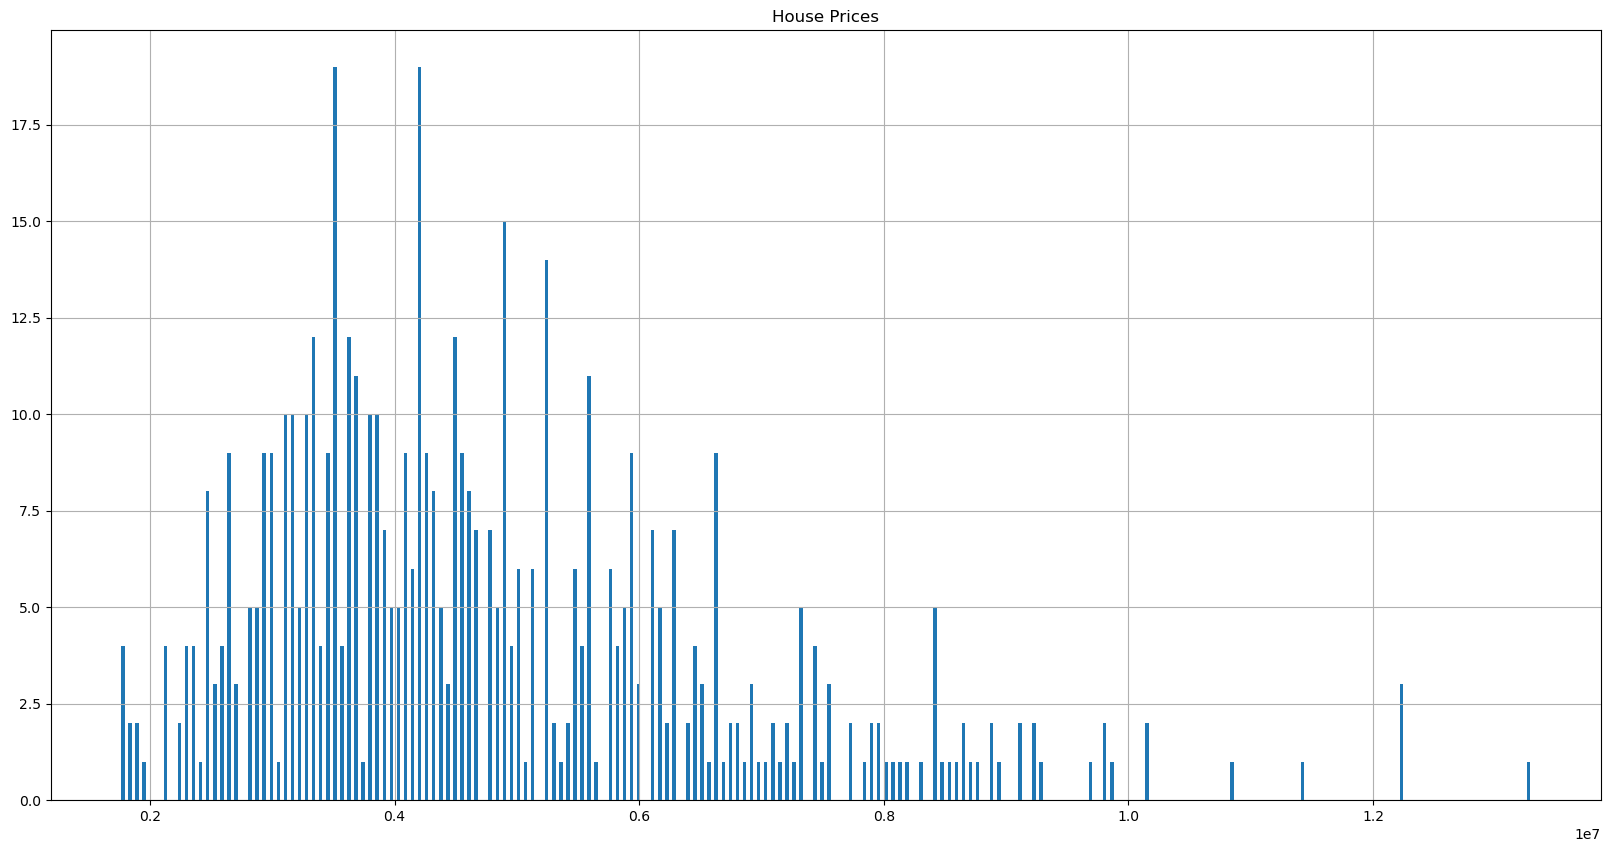

In [120]:
df['price'].hist(bins=200,rwidth = 0.5,figsize=(20,10))
plt.title('House Prices')
plt.show()